# Read in mse.txt and plot the data with regression

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) #Just too annoying
import pandas as pd


In [6]:
#read in the data from the txt file

data = pd.read_csv('stats.txt', sep=" ")

#sort my CR descending
data.sort_values(by=['CR'], ascending=False, inplace=True)

print(data)

FileNotFoundError: [Errno 2] No such file or directory: 'mse.txt'

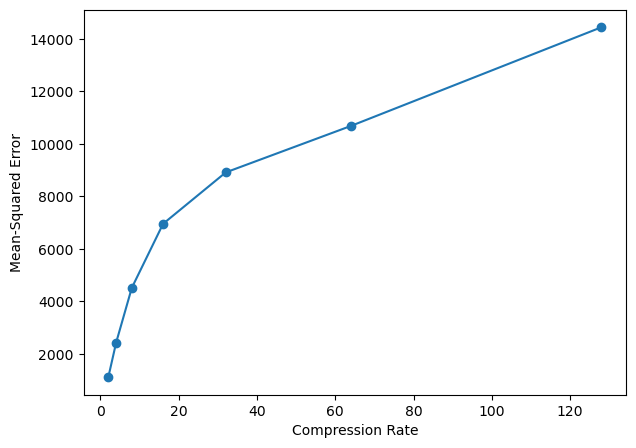

In [ ]:
plt.figure(figsize=(7, 5))

#plot by CR in descending order
plt.plot(data["CR"], data["MSE"], 'o-')
plt.ylabel('Mean-Squared Error')
plt.xlabel('Compression Rate')
#set yticks to be the exact values
#plt.yticks(data["CR"])
#plt.xticks(data["MSE"].round(-1))

#plt.savefig("ConvAutoencoder/Images/mse.png")

plt.show()

In [7]:
plt.figure(figsize=(7, 5))

#plot by CR in descending order
plt.plot(data["CR"], data["SNR"], 'o-')
plt.ylabel('SNR')
plt.xlabel('Compression Rate')
#set yticks to be the exact values
#plt.yticks(data["CR"])
#plt.xticks(data["MSE"].round(-1))

#plt.savefig("ConvAutoencoder/Images/mse.png")

plt.show()

NameError: name 'data' is not defined

<Figure size 700x500 with 0 Axes>

# Read the spike data from the files

In [16]:
def readFile(filename) -> pd.DataFrame:
    file = open(filename, "r")
    lines = file.readlines()
    lines = [line.strip() for line in lines]
    file.close()

    #parse the data into a dataframe
    #split into chunks based in seperator line
    seperator_line = "-"*150
    chunks = []
    chunk = []
    for line in lines:
        if line == seperator_line:
            chunks.append(chunk)
            chunk = []
        else:
            chunk.append(line)

    columns = ["Threshold", "Original", "Decoded", "Remained", "Percentage Remained", "Newly Created"]
    data = pd.DataFrame(columns=columns)
    for chunk in chunks:
        cur_threshold = float(chunk[0].split("threshold")[1].split(":")[0])
        cur_original = int(chunk[0].split(":")[1])
        cur_decoded = int(chunk[1].split(":")[1])
        cur_remained = int(chunk[2].split(":")[1])
        cur_percentage_remained = float(chunk[3].split(":")[1])
        cur_newly_created = int(chunk[4].split(":")[1])
        data = data.append({"Threshold": cur_threshold, "Original": cur_original, "Decoded": cur_decoded, "Remained": cur_remained, "Percentage Remained": cur_percentage_remained, "Newly Created": cur_newly_created}, ignore_index=True)

    data = data.astype({"Threshold": float, "Original": int, "Decoded": int, "Remained": int, "Percentage Remained": float, "Newly Created": int})
    data.set_index("Threshold", inplace=True)
    return data

file_base = "Models/CR_i_spike_data.txt"

CRs = [2,4,8,16,32,64,128]
files = [file_base.replace("CR_i", f"CR_{cr}") for cr in CRs]

data = {cr : readFile(file) for cr, file in zip(CRs, files)}

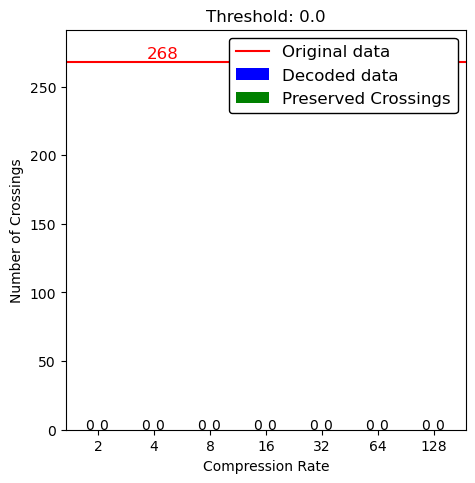

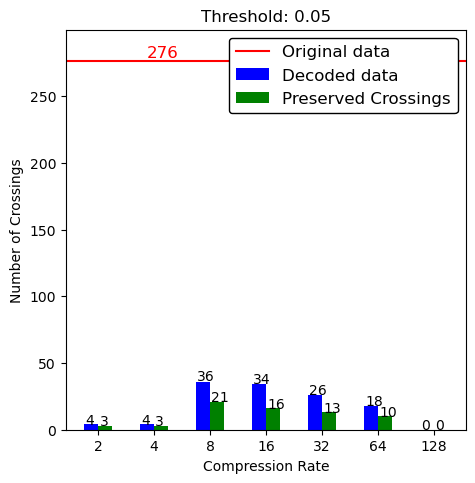

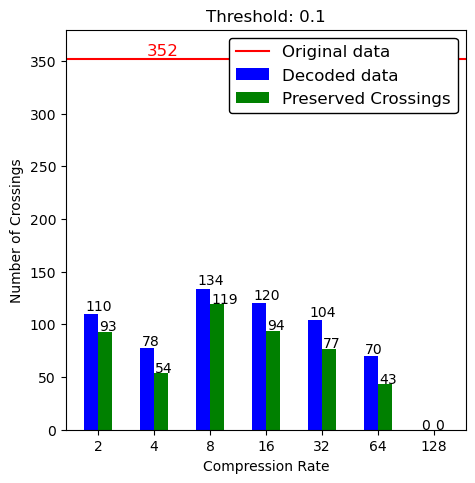

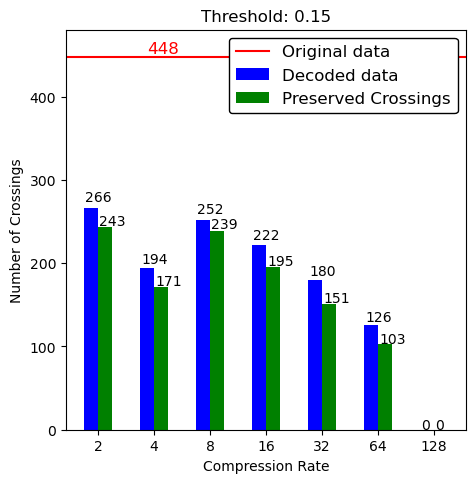

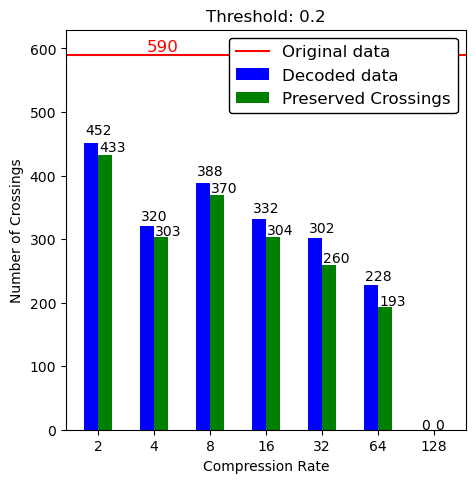

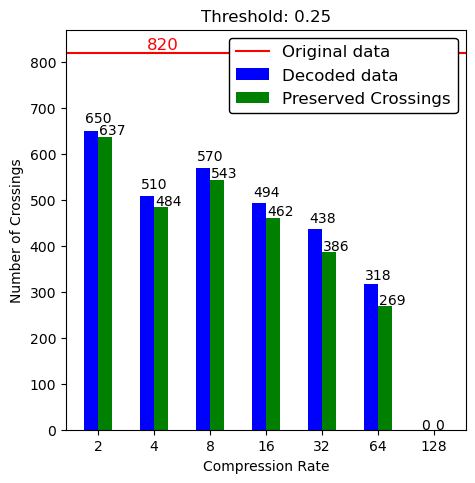

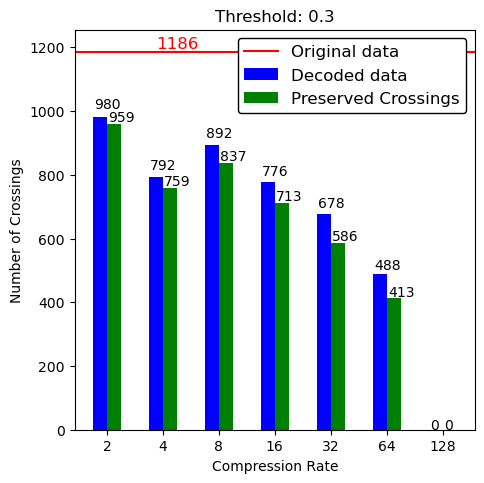

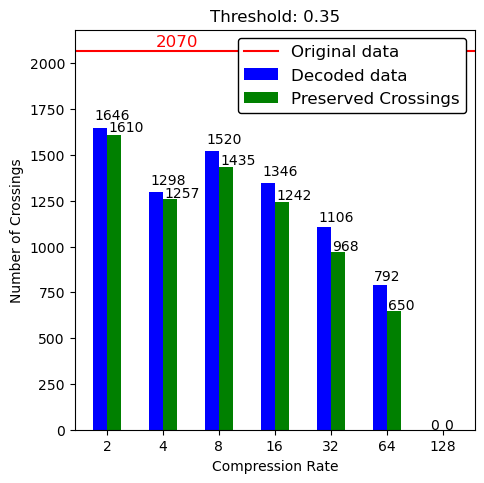

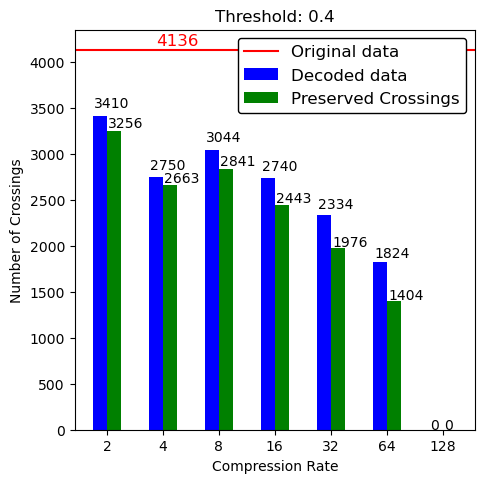

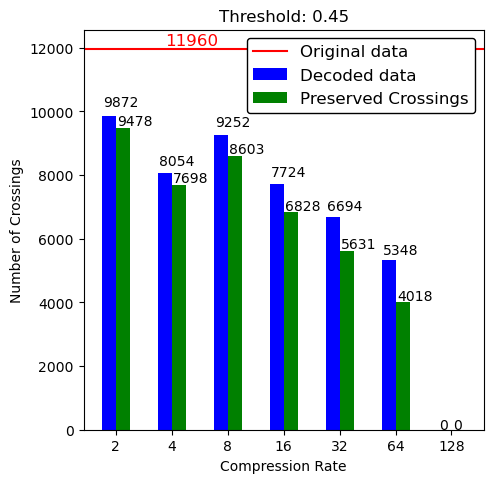

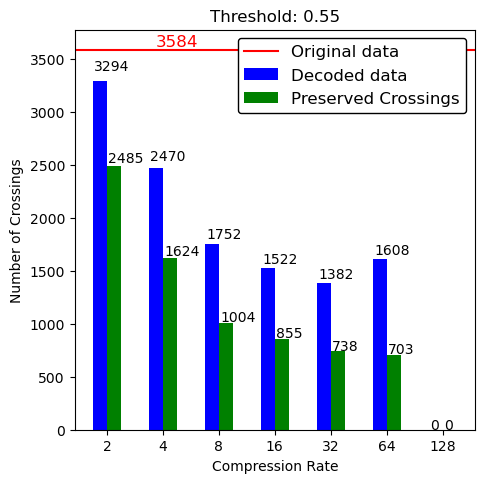

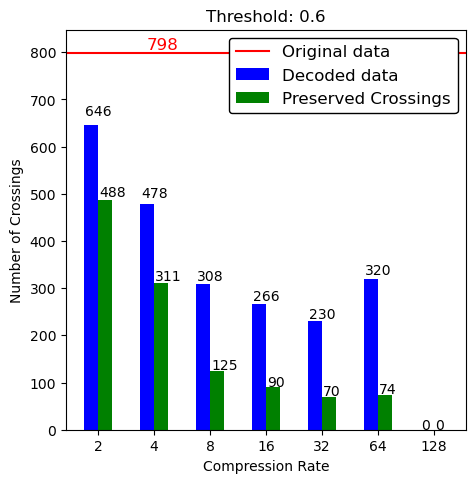

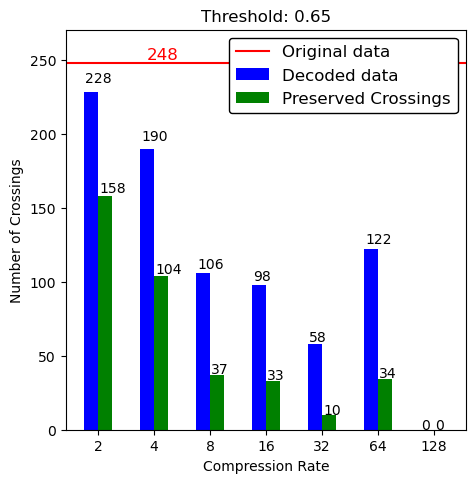

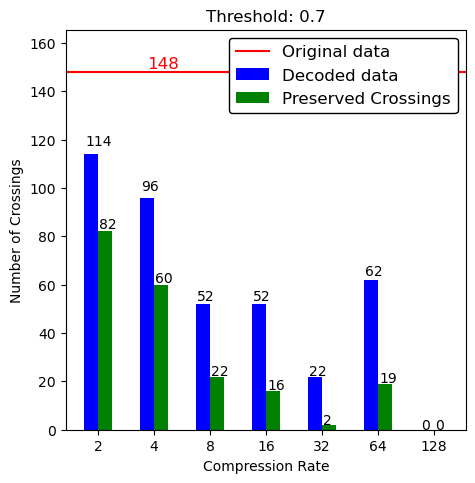

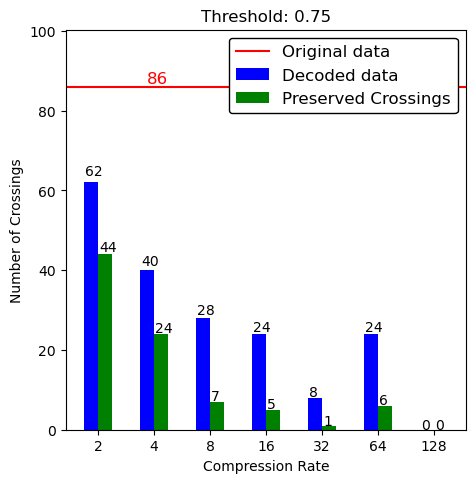

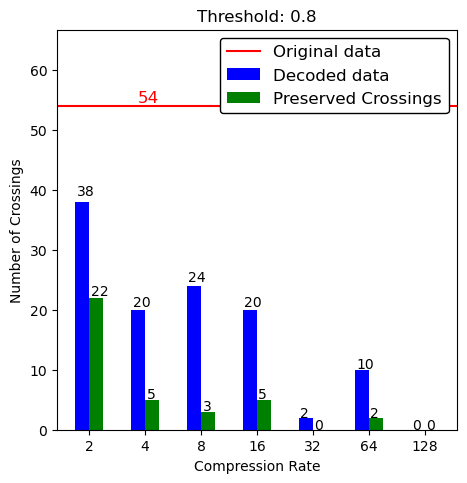

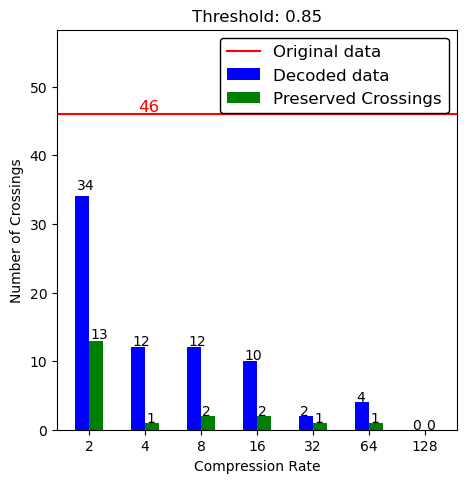

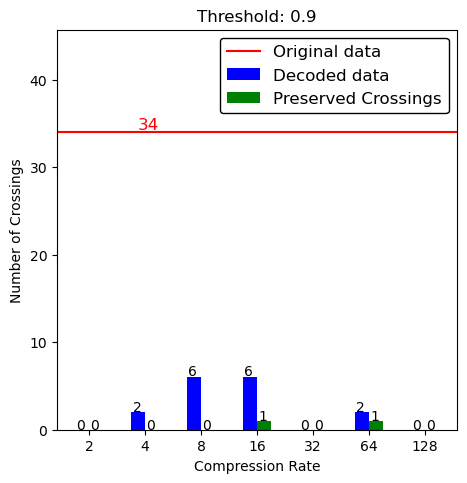

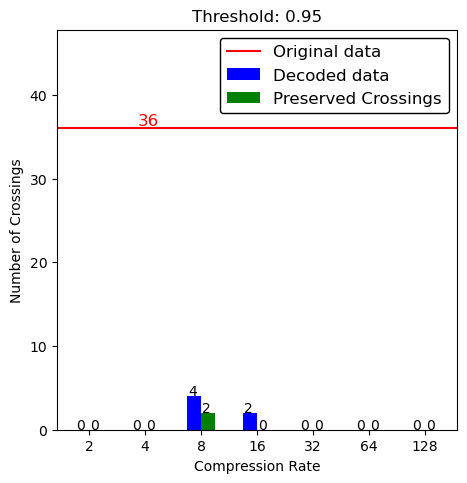

In [26]:

def plot_original_decoded_spikes(threshold) : 
    decoded_absolute_spikes = [(cr, data[cr]["Decoded"][threshold]) for cr in CRs]
    decoded_remaining_spikes = [(cr, data[cr]["Remained"][threshold]) for cr in CRs]
    original_absolute_spikes = data[2]["Original"][threshold] #CR doesn't matter here, just take 2

    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_axes([0,0,1,1])
    X = np.arange(len(CRs))
    width = 0.25
    ax.bar(X + 0.00, [x[1] for x in decoded_absolute_spikes], color = 'b', width = width, label="Decoded data")
    ax.bar(X + 0.25, [x[1] for x in decoded_remaining_spikes], color = 'g', width = width, label="Preserved Crossings")
    ax.axhline(y=original_absolute_spikes, color='r', linestyle='-', label="Original data")

    #write the absolute number of spikes on top of the bars
    for i, cr in enumerate(CRs):
        ax.text(i - 0.1, decoded_absolute_spikes[i][1] + decoded_absolute_spikes[i][1] * 0.03, decoded_absolute_spikes[i][1])
        ax.text(i + 0.15, decoded_remaining_spikes[i][1] + decoded_absolute_spikes[i][1] * 0.01, decoded_remaining_spikes[i][1])

    #add label for the red line
    ax.text(1, original_absolute_spikes + original_absolute_spikes * 0.01, original_absolute_spikes, color='r', fontsize=12)

    ax.set_xticks(X + width / 2)
    ax.set_xticklabels(CRs)
    legend = plt.legend(loc="upper right", edgecolor="black", prop={'size': 12})
    legend.get_frame().set_alpha(None)
    lims = ax.get_ylim()
    ax.set_ylim(0, lims[1] + 10)
    plt.xlabel('Compression Rate')
    plt.ylabel('Number of Crossings')
    plt.title("Threshold: " + str(threshold))
    plt.savefig("Images/spikes_threshold_"+str(threshold).replace(".","") + ".png", bbox_inches='tight')
    #plt.close()

for threshold in data[2].index:
    plot_original_decoded_spikes(threshold)


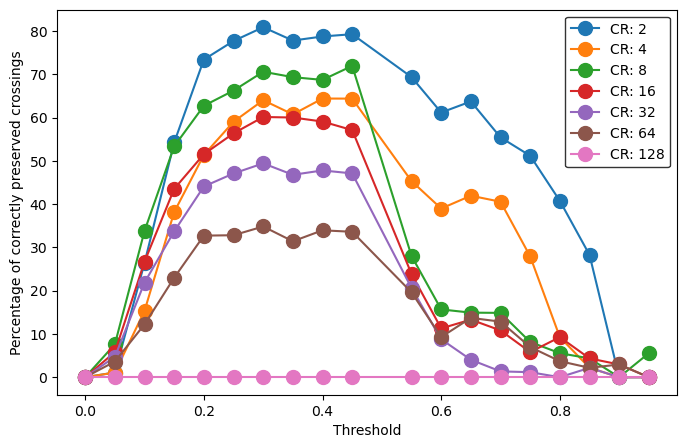

In [38]:
plt.figure(figsize=(8, 5))
for cr in CRs:
    plt.plot(data[cr].index, data[cr]["Percentage Remained"], label=f"CR: {cr}", marker='o', markersize=10)
plt.xlabel('Threshold')
plt.ylabel('Percentage of correctly preserved crossings')
plt.legend(loc="upper right", edgecolor="black")

plt.savefig("Images/percentage_decoded.png")